#### Getting the Data

In [12]:
import numpy as np

csv_path = "C:\\Users\\Adetu\\workspace\\dpro\\py311\\mtfuji_data.csv"

# Set prohibition of scientific notation
np.set_printoptions(suppress=True)

# Load the CSV file
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])


[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


#### Problem 1: Data Visualization

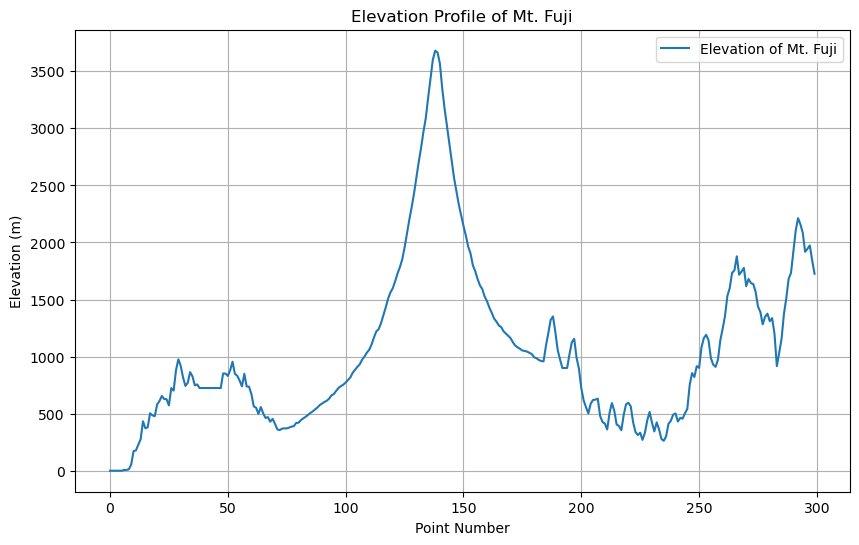

In [45]:
# Visualizing the elevation data

import matplotlib.pyplot as plt

# Extracting the columns: number of the point (x-axis) and elevation (y-axis)
points = fuji[:, 0]
elevations = fuji[:, 3]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(points, elevations, label='Elevation of Mt. Fuji')
plt.xlabel('Point Number')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile of Mt. Fuji')
plt.legend()
plt.grid(True)
plt.show()


#### Problem 2: Function to Calculate the Gradient at a Certain Point

In [48]:
def calculate_gradient(point, elevations):
    if point == 0:
        return (elevations[point + 1] - elevations[point])
    else:
        return (elevations[point] - elevations[point - 1])

# Testing the function
point = 136
gradient = calculate_gradient(point, elevations)
print(f"Gradient at point {point}: {gradient}")



Gradient at point 136: 168.35000000000036


#### Problem 3: Function to Calculate the Destination Point

In [49]:
def calculate_next_point(current_point, elevations, alpha=0.2):
    gradient = calculate_gradient(current_point, elevations)
    next_point = current_point - alpha * gradient
    # Ensuring the point is an integer and within valid range
    next_point = max(0, min(len(elevations) - 1, int(round(next_point))))
    return next_point

# Testing the function
next_point = calculate_next_point(point, elevations)
print(f"Next point from {point}: {next_point}")



Next point from 136: 102


#### Problem 4: Function to Descend the Mountain

In [53]:
def descend_mountain(start_point, elevations, alpha=0.2):
    points_visited = [start_point]
    current_point = start_point

    while True:
        next_point = calculate_next_point(current_point, elevations, alpha)
        if next_point == current_point:
            break
        points_visited.append(next_point)
        current_point = next_point

    return points_visited

# Testing the function
start_point = 136
descent_path = descend_mountain(start_point, elevations)
print(f"Path of descent: {descent_path}")


Path of descent: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


#### Problem 5: Visualization of the Descent Process

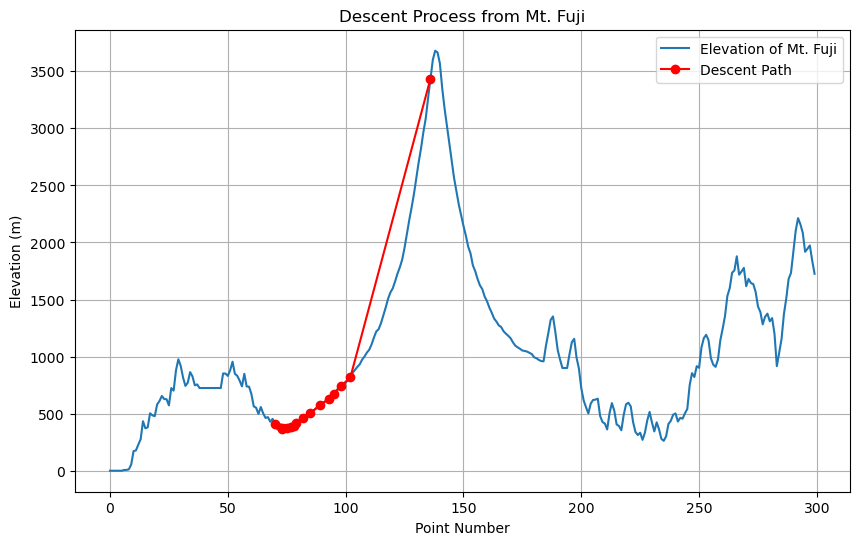

In [57]:
# Visualizing the descent process

def visualize_descent(descent_path, points, elevations):
    plt.figure(figsize=(10, 6))
    plt.plot(points, elevations, label='Elevation of Mt. Fuji')
    descent_elevations = [elevations[p] for p in descent_path]
    plt.plot(descent_path, descent_elevations, 'ro-', label='Descent Path')
    plt.xlabel('Point Number')
    plt.ylabel('Elevation (m)')
    plt.title('Descent Process from Mt. Fuji')
    plt.legend()
    plt.grid(True)
    plt.show()

# The visualization
visualize_descent(descent_path, points, elevations)


#### [Problem 6] Change of initial value

In [63]:
descent_path = []
for i, start_position in enumerate(range(1, 300)):
    descent_path.append(descend_mountain(start_point, elevations, alpha=0.2))
    print(len(descent_path))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


#### [Problem 7] Visualization of the descent process for each initial value

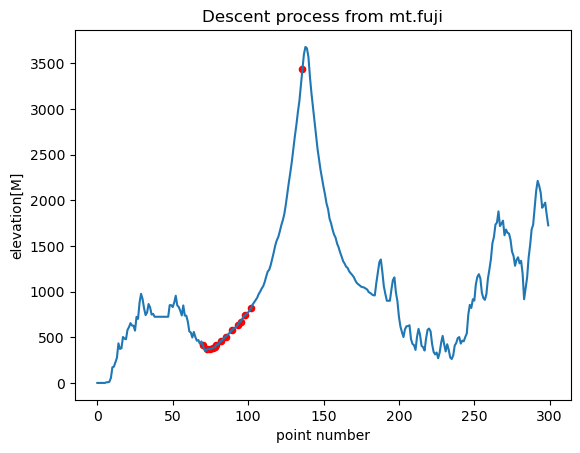

In [67]:
plt.title("Descent process from mt.fuji")
plt.ylabel("elevation[M]")
plt.xlabel("point number")
plt.plot(fuji[:, 3])
plt.scatter(descent_path[141], fuji[:, 3][descent_path[141]], 20, color = "red")
plt.show()

#### [Problem 8] (Advance problem) Hyperparameter changes

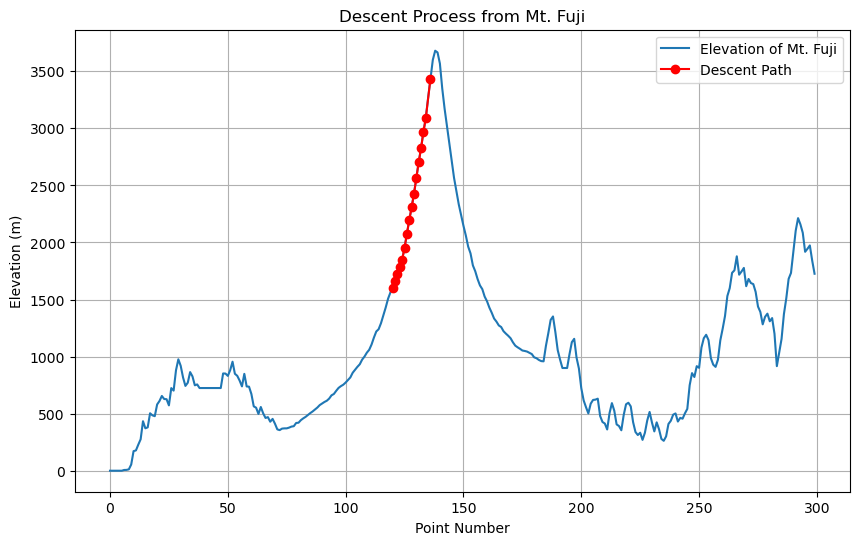

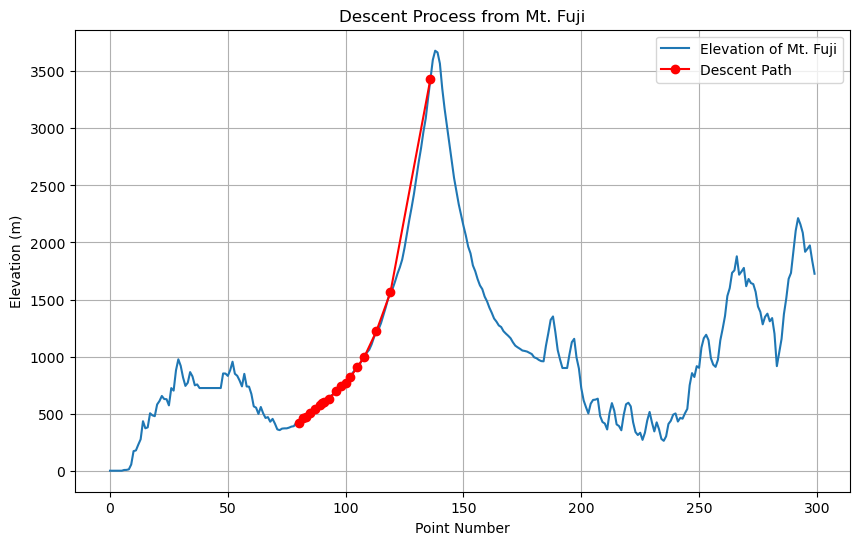

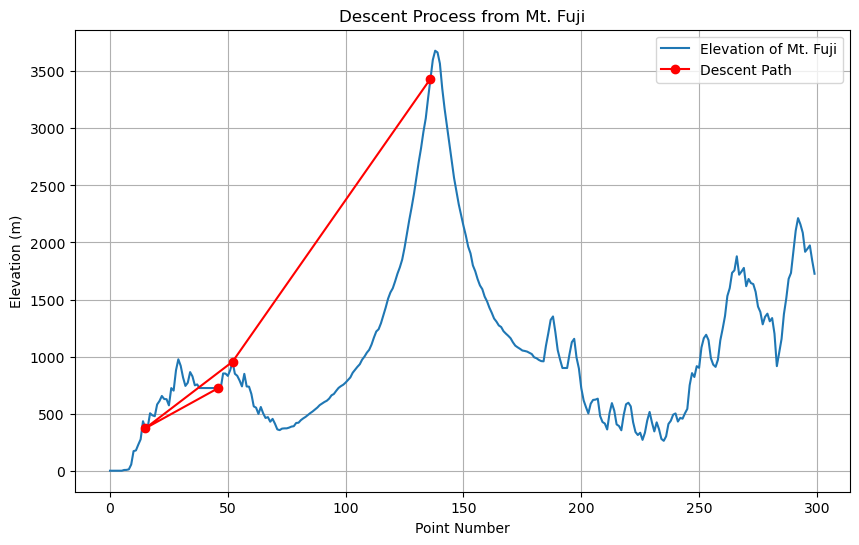

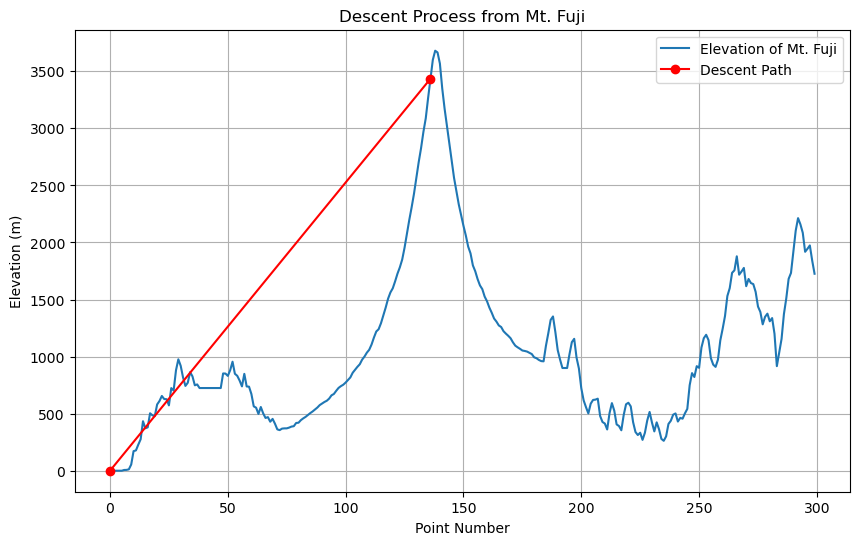

In [68]:
alphas = [0.01, 0.1, 0.5, 1.0]

for alpha in alphas:
    descent_path = descend_mountain(start_point, elevations, alpha)
    visualize_descent(descent_path, points, elevations)
